# Model Training and Parameter Tuning

![](http://topepo.github.io/caret/premade/TrainAlgo.png)

# An Example

In [1]:
library(mlbench)
data(Sonar)
dim(Sonar)
str(Sonar[,1:10])

[1] 208  61

'data.frame':	208 obs. of  10 variables:
 $ V1 : num  0.02 0.0453 0.0262 0.01 0.0762 0.0286 0.0317 0.0519 0.0223 0.0164 ...
 $ V2 : num  0.0371 0.0523 0.0582 0.0171 0.0666 0.0453 0.0956 0.0548 0.0375 0.0173 ...
 $ V3 : num  0.0428 0.0843 0.1099 0.0623 0.0481 ...
 $ V4 : num  0.0207 0.0689 0.1083 0.0205 0.0394 ...
 $ V5 : num  0.0954 0.1183 0.0974 0.0205 0.059 ...
 $ V6 : num  0.0986 0.2583 0.228 0.0368 0.0649 ...
 $ V7 : num  0.154 0.216 0.243 0.11 0.121 ...
 $ V8 : num  0.16 0.348 0.377 0.128 0.247 ...
 $ V9 : num  0.3109 0.3337 0.5598 0.0598 0.3564 ...
 $ V10: num  0.211 0.287 0.619 0.126 0.446 ...


In [2]:
library(caret)
set.seed(998)
inTraining <- createDataPartition(Sonar$Class,p=0.75,list=F)
training <- Sonar[inTraining,]
testing <- Sonar[-inTraining,]

Loading required package: lattice
Loading required package: ggplot2


In [27]:
plt_data <- data.frame(data_set=rep("original",nrow(Sonar)),cls=Sonar$Class)
plt_data <- rbind(
                  plt_data,
                  data.frame(data_set=rep("trn",nrow(training)),cls=training$Class),
                   data.frame(data_set=rep("vld",nrow(testing)),cls=testing$Class))

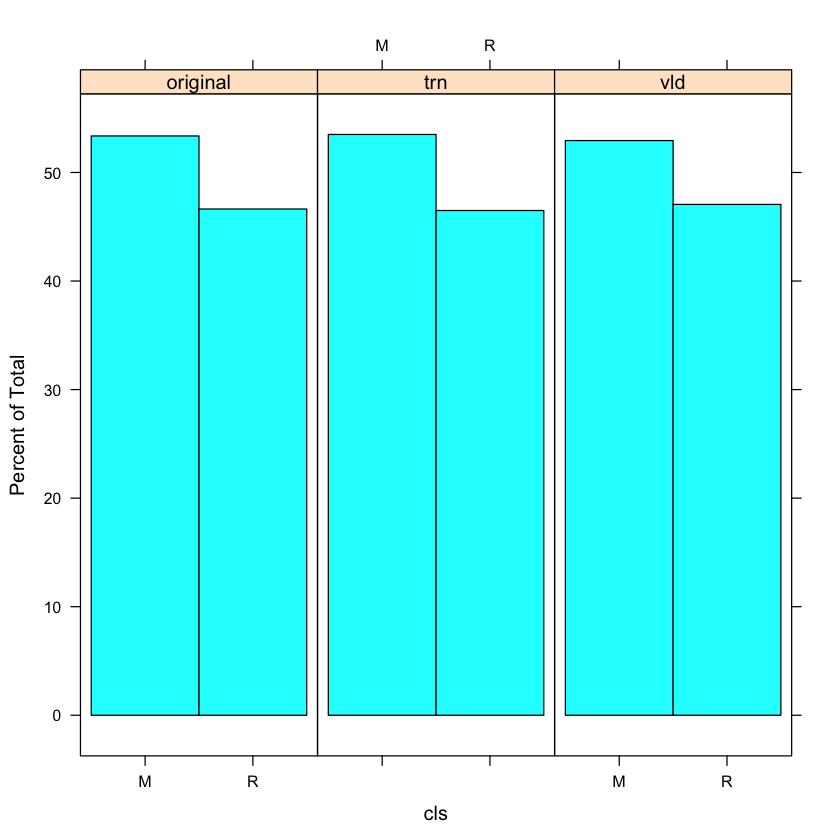

In [36]:
library(lattice)
histogram(~cls|data_set,data=plt_data,layout = c(3,1))

# Basic Parameter Tuning

In [37]:
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)

In [38]:
set.seed(825)
gbmFit1 <- train(Class~.,data=training,method = "gbm",trControl = fitControl,verbose=F)

Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


In [39]:
gbmFit1

Stochastic Gradient Boosting 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 141, 141, 142, 141, 141, 142, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.7876495  0.5712306
  1                  100      0.7957794  0.5867732
  1                  150      0.8140441  0.6235694
  2                   50      0.8073676  0.6101031
  2                  100      0.8158211  0.6263183
  2                  150      0.8244608  0.6441406
  3                   50      0.8167843  0.6294107
  3                  100      0.8251127  0.6458154
  3                  150      0.8284510  0.6522968

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using  the largest value.
The final values us

# Notes on Reproducibility
Many models utilize random numbers during the phase where parameters are estimated. Also, the resampling indices are chosen using random numbers.

# Customizing the Tuning Process

## Pre-Processing Options

## Alternate Tuning Grids

In [11]:
gbmGrid <-  expand.grid(interaction.depth = c(1, 5, 9), 
                        n.trees = (1:30)*50, 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)
                        
#nrow(gbmGrid)

set.seed(825)
gbmFit2 <- train(Class ~ ., data = training, 
                 method = "gbm", 
                 trControl = fitControl, 
                 verbose = FALSE, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = gbmGrid)
gbmFit2

Stochastic Gradient Boosting 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 141, 141, 142, 141, 141, 142, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                    50     0.7715196  0.5383303
  1                   100     0.7962255  0.5884175
  1                   150     0.8134387  0.6230354
  1                   200     0.8204485  0.6379029
  1                   250     0.8212402  0.6393044
  1                   300     0.8211936  0.6388168
  1                   350     0.8208088  0.6380987
  1                   400     0.8227672  0.6419025
  1                   450     0.8273824  0.6512246
  1                   500     0.8233922  0.6430845
  1                   550     0.8245588  0.6451007
  1                   600     0.8213505  0.6390116
  1                   650     0.8220588  0.6402634
  1                   7

## Plotting the Resampling Profile

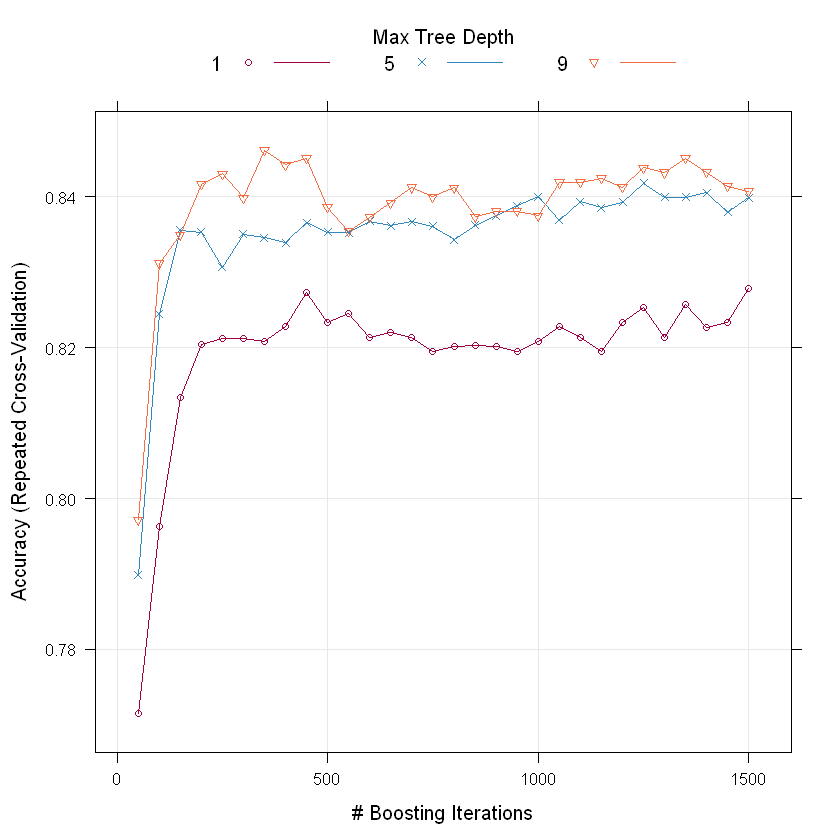

In [12]:
trellis.par.set(caretTheme())
plot(gbmFit2)  

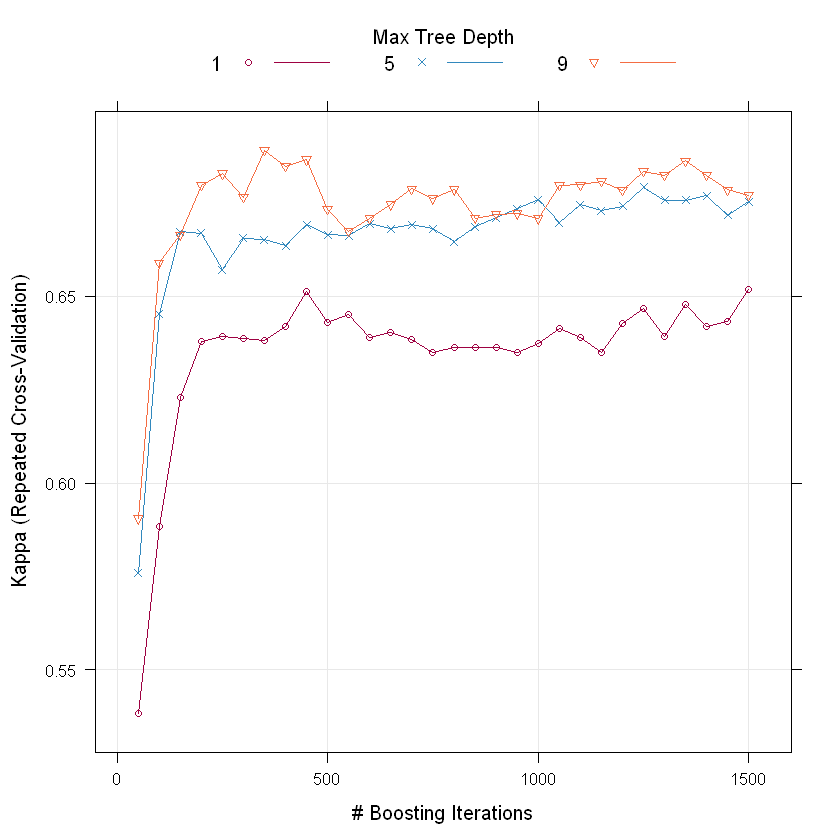

In [13]:
trellis.par.set(caretTheme())
plot(gbmFit2, metric = "Kappa")

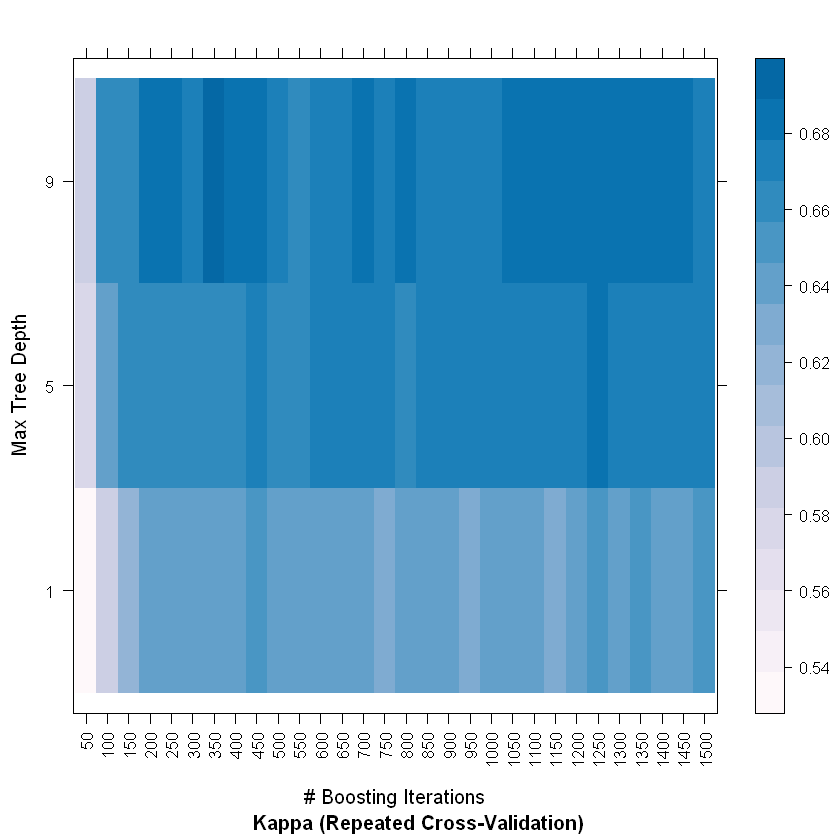

In [14]:
trellis.par.set(caretTheme())
plot(gbmFit2, metric = "Kappa", plotType = "level",
     scales = list(x = list(rot = 90)))

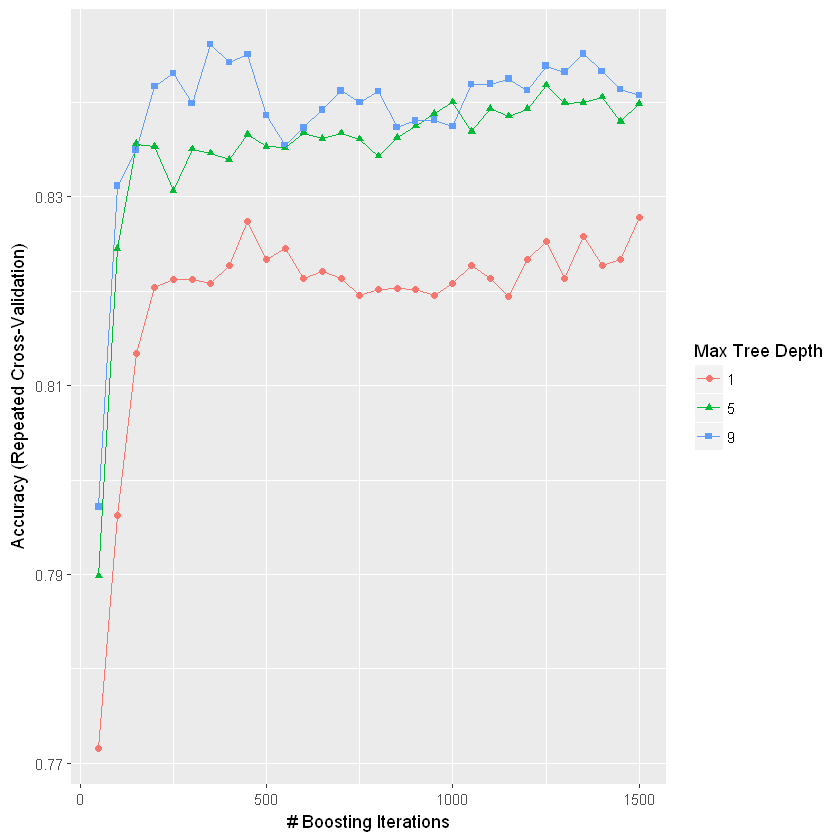

In [15]:
ggplot(gbmFit2)  

## The trainControl Function

## Alternate Performance Metrics

In [18]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = twoClassSummary)

gbmGrid <-  expand.grid(interaction.depth = c(1, 5, 9), 
                        n.trees = (1:30)*50, 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)

set.seed(825)
gbmFit3 <- train(Class ~ ., data = training, 
                 method = "gbm", 
                 trControl = fitControl, 
                 verbose = FALSE, 
                 tuneGrid = gbmGrid,
                 ## Specify which metric to optimize
                 metric = "ROC")
gbmFit3

Stochastic Gradient Boosting 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 141, 141, 142, 141, 141, 142, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  ROC        Sens       Spec     
  1                    50     0.8720635  0.8279167  0.7089286
  1                   100     0.8833358  0.8454167  0.7417857
  1                   150     0.8917808  0.8520833  0.7694643
  1                   200     0.8906746  0.8550000  0.7823214
  1                   250     0.8935144  0.8573611  0.7814286
  1                   300     0.8944469  0.8572222  0.7810714
  1                   350     0.8915972  0.8598611  0.7776786
  1                   400     0.8896999  0.8647222  0.7760714
  1                   450     0.8927654  0.8629167  0.7873214
  1                   500     0.8923214  0.8605556  0.7812500
  1                   550     0.8916270  0.8626389  0.7

# Choosing the Final Model

In [20]:
whichTwoPct <- tolerance(gbmFit3$results, metric = "ROC", 
                         tol = 2, maximize = TRUE)  
cat("best model within 2 pct of best:\n")

best model within 2 pct of best:


In [21]:
gbmFit3$results[whichTwoPct,1:6]

,shrinkage,interaction.depth,n.minobsinnode,n.trees,ROC,Sens
32,0.1,5,20,100,0.901255,0.8677778


# Extracting Predictions and Class Probabilities

In [22]:
gbmFit3$finalModel

A gradient boosted model with bernoulli loss function.
250 iterations were performed.
There were 60 predictors of which 59 had non-zero influence.

In [23]:
predict(gbmFit3,newdata = head(testing))

[1] R R R R M M
Levels: M R

In [24]:
predict(gbmFit3, newdata = head(testing), type = "prob")

M,R
0.2600273005,0.73997270
0.0113631254,0.98863687
0.0003797417,0.99962026
0.1532818480,0.84671815
0.9879809255,0.01201907
0.6342884390,0.36571156


# Exploring and Comparing Resampling Distributions

## Within-Model

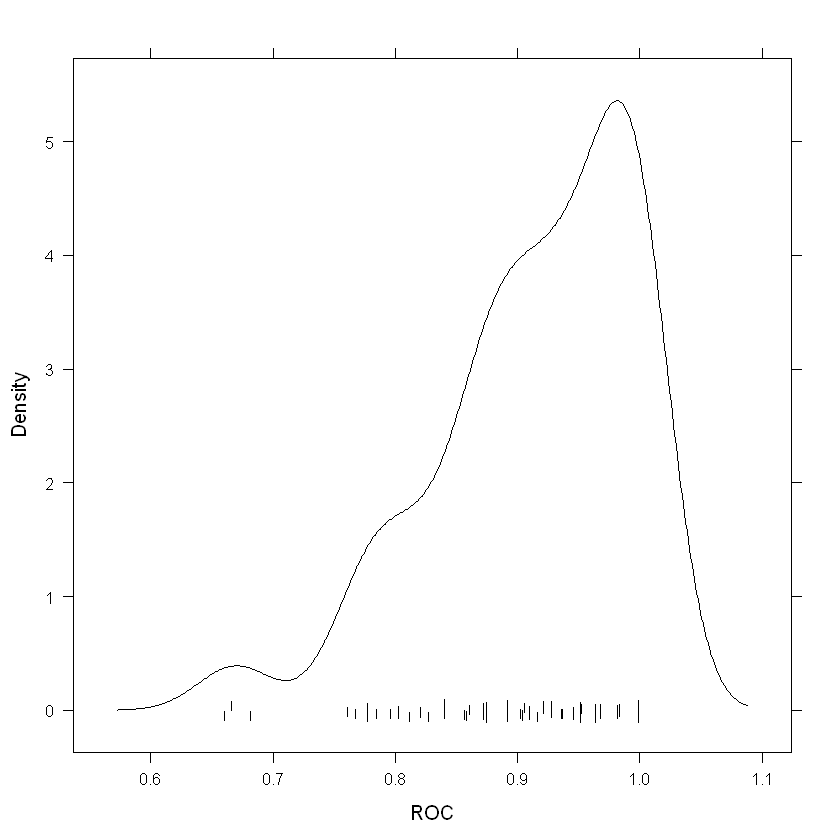

In [26]:
trellis.par.set(caretTheme())
densityplot(gbmFit3, pch = "|",resamples = "all")

## Between-Models

In [27]:
set.seed(825)
svmFit <- train(Class ~ ., data = training, 
                 method = "svmRadial", 
                 trControl = fitControl, 
                 preProc = c("center", "scale"),
                 tuneLength = 8,
                 metric = "ROC")
svmFit    

Support Vector Machines with Radial Basis Function Kernel 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

Pre-processing: centered (60), scaled (60) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 141, 141, 142, 141, 141, 142, ... 
Resampling results across tuning parameters:

  C      ROC        Sens       Spec     
   0.25  0.8700471  0.7572222  0.7539286
   0.50  0.9102133  0.8587500  0.7819643
   1.00  0.9344767  0.8809722  0.7807143
   2.00  0.9346230  0.8870833  0.7878571
   4.00  0.9455828  0.8979167  0.8192857
   8.00  0.9486012  0.9002778  0.8162500
  16.00  0.9491146  0.9050000  0.8216071
  32.00  0.9491146  0.9119444  0.8164286

Tuning parameter 'sigma' was held constant at a value of 0.01334808
ROC was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.01334808 and C = 16.

In [28]:
set.seed(825)
rdaFit <- train(Class ~ ., data = training, 
                 method = "rda", 
                 trControl = fitControl, 
                 tuneLength = 4,
                 metric = "ROC")
rdaFit    

Regularized Discriminant Analysis 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 141, 141, 142, 141, 141, 142, ... 
Resampling results across tuning parameters:

  gamma      lambda     ROC        Sens       Spec     
  0.0000000  0.0000000  0.6677145  0.9052778  0.3998214
  0.0000000  0.3333333  0.8516543  0.8425000  0.7564286
  0.0000000  0.6666667  0.8697941  0.8212500  0.7969643
  0.0000000  1.0000000  0.8560193  0.7772222  0.7898214
  0.3333333  0.0000000  0.9069866  0.8884722  0.7630357
  0.3333333  0.3333333  0.9247817  0.9201389  0.7942857
  0.3333333  0.6666667  0.9247148  0.9251389  0.7830357
  0.3333333  1.0000000  0.8782242  0.8462500  0.7817857
  0.6666667  0.0000000  0.9015352  0.8804167  0.7557143
  0.6666667  0.3333333  0.9100471  0.9044444  0.7607143
  0.6666667  0.6666667  0.9033209  0.9013889  0.7687500
  0.6666667  1.0000000  0.8704638  0.8077778  0.7883929
  1.

In [29]:
resamps <- resamples(list(GBM = gbmFit3,
                          SVM = svmFit,
                          RDA = rdaFit))
summary(resamps)


Call:
summary.resamples(object = resamps)

Models: GBM, SVM, RDA 
Number of resamples: 100 

ROC 
         Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
GBM 0.6607143 0.8745040 0.9285714 0.9141096 0.9841890    1    0
SVM 0.7500000 0.9265873 0.9642857 0.9491146 0.9895833    1    0
RDA 0.6964286 0.8901910 0.9365079 0.9247817 0.9747024    1    0

Sens 
         Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
GBM 0.4444444 0.7777778 0.8888889 0.8830556       1    1    0
SVM 0.5555556 0.8506944 1.0000000 0.9050000       1    1    0
RDA 0.6250000 0.8750000 1.0000000 0.9201389       1    1    0

Spec 
         Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
GBM 0.4285714 0.7142857 0.8571429 0.7978571   0.875    1    0
SVM 0.2857143 0.7142857 0.8571429 0.8216071   1.000    1    0
RDA 0.4285714 0.7142857 0.8571429 0.7942857   0.875    1    0


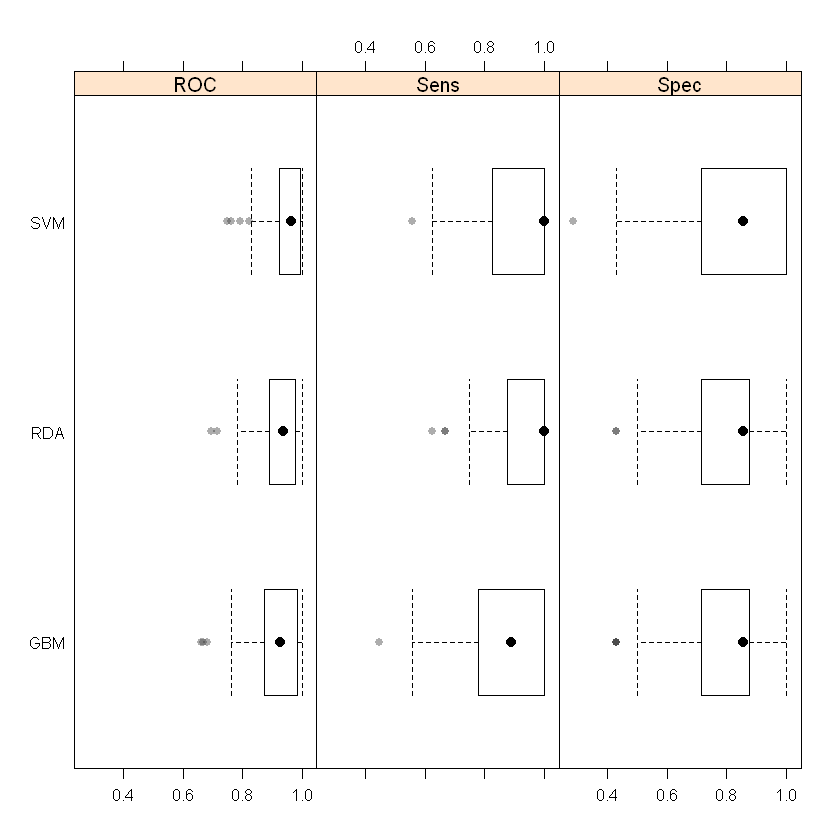

In [30]:
theme1 <- trellis.par.get()
theme1$plot.symbol$col = rgb(.2, .2, .2, .4)
theme1$plot.symbol$pch = 16
theme1$plot.line$col = rgb(1, 0, 0, .7)
theme1$plot.line$lwd <- 2
trellis.par.set(theme1)
bwplot(resamps, layout = c(3, 1))

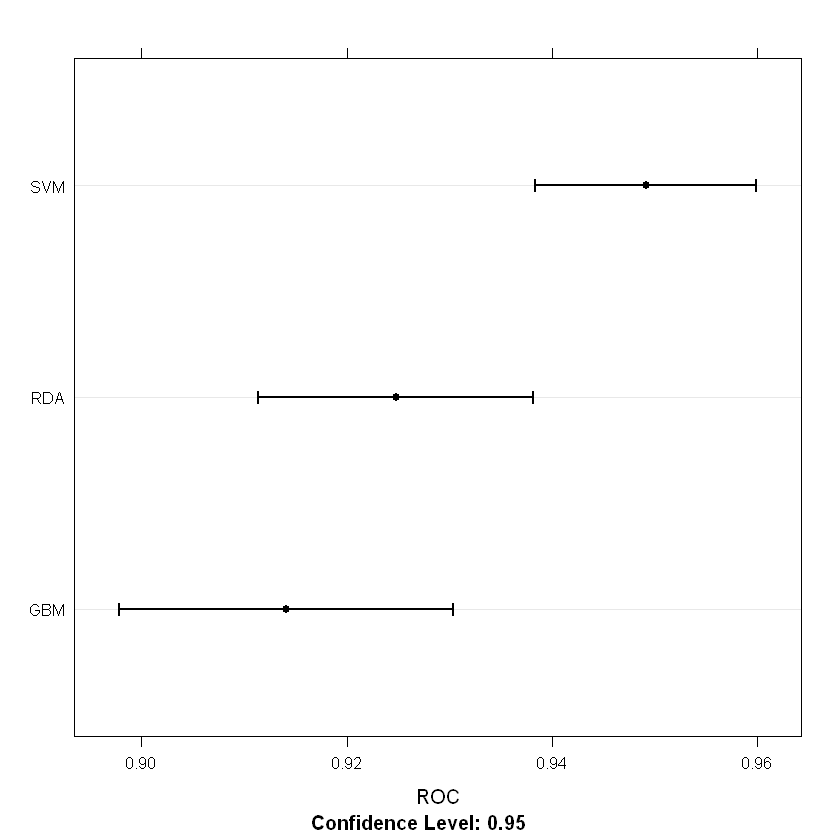

In [31]:
trellis.par.set(caretTheme())
dotplot(resamps, metric = "ROC")

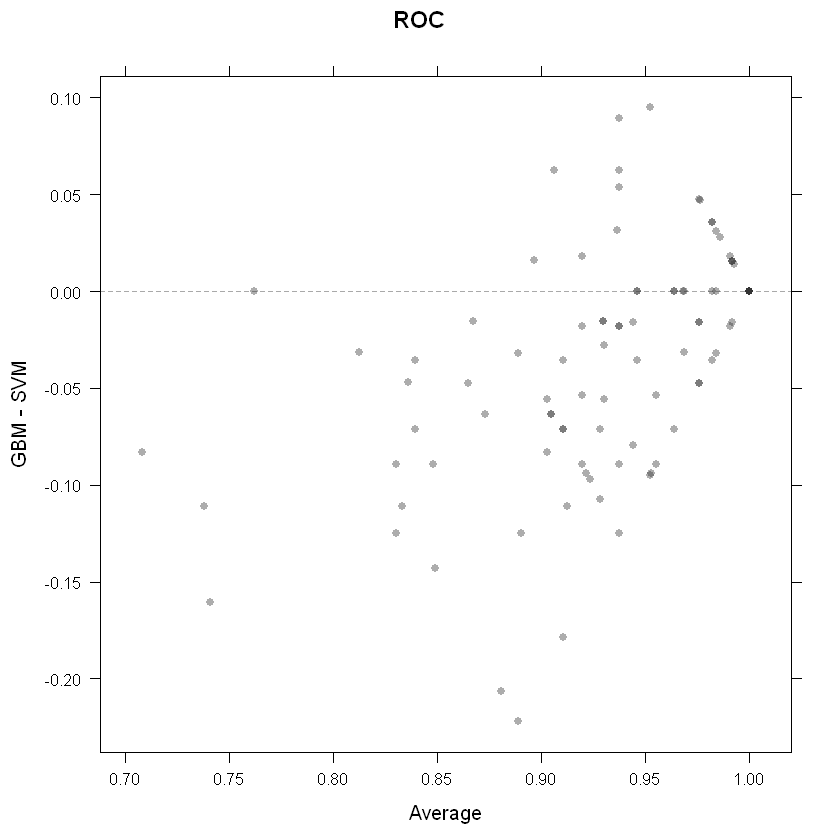

In [32]:
trellis.par.set(theme1)
xyplot(resamps, what = "BlandAltman")

# Fitting Models Without Parameter Tuning

In [33]:
fitControl <- trainControl(method = "none", classProbs = TRUE)

set.seed(825)
gbmFit4 <- train(Class ~ ., data = training, 
                 method = "gbm", 
                 trControl = fitControl, 
                 verbose = FALSE, 
                 ## Only a single model can be passed to the
                 ## function when no resampling is used:
                 tuneGrid = data.frame(interaction.depth = 4,
                                       n.trees = 100,
                                       shrinkage = .1,
                                       n.minobsinnode = 20),
                 metric = "ROC")
gbmFit4

Stochastic Gradient Boosting 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: None 